Project 1: 

Vous êtes nouvel embauche chez CoolCorp, une startup qui spécialise
dans l'analyse des désastres maritimes.  Un nouveau client, White Star
Lines, se trouve face à un procès à travers le temps, affaire délicat.
Votre chef vous demande, en tant que seul data scientist chez
CoolCorp, d'analyser les données `*.csv`.  WSL a déjà engagé un expert
pour annoter une partie des données (`test.csv`) avec la survie ou pas
des passagers.

1ère étape: Ouverture des fichiers csv

la librairie pandas permets une ouverture facile de fichiers csv par la fonction read_csv() sous le format d'un dataframe qui permet d'utiliser un certain nombres de fonctions pré-implémentées dans l'objet python créé (c'est à dire 'dfTrain')

voir http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

Pour l'instant seul le fichier 'train.csv' nous interesse puisque le fichier 'test.csv' est censé être traité par un autre expert. 

In [2]:
# import de la librairie pandas qui sera appelée par l'acronyme 'pd' dans le corps du code
import pandas as pd

# header = 0 indique la présence de titres sur chaque colonne
dfTrain = pd.read_csv('train.csv', header=0)

2nde étape: observation du dataset

les fonctions spécifiques au format dataframe et présentées dans pandas.ipynb seront utiles pour cette étape:
* df.head()
* df.dtypes
* df.info()
* df.describe()


In [3]:
# .head() affiche les 5 premieres lignes du dataframe
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


On peut ainsi se donner une idée des données présentent et que ces 12 colonnes représentent:

* PassengerId : un identifiant unique pour chaque passager
* Survived : une variable booléenne qui prends la valeur 0 : n'a pas survécu ou 1 : a survécu
* Pclass : la classe de voyageur dans laquelle se trouvait le passager (1 : 1ere classe, etc)
* Name : le nom complet du passager
* Sex : une variable booléenne qui détermine le sexe des passagers (male / female)
* Age : l'age du passager
* SibSp: Nombre de frères et soeurs
* Parch: taille de la famille
* Ticket : numéro de ticket de passager
* Fare: Prix du ticket de passager
* Cabin: Numéro de cabine (attention les passagers de 3ième classe n'ont probablement pas de cabine personnelle)
* Embarked: Premiere lettre du lieu d'embarcation (S , C , etc)



In [6]:
# informe de la nature des données
dfTrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# résumé plus complet du dataframe:  
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Renseigne sur:
* la nature de l'objet analysé (dataframe)
* le nombre de lignes (891)
* nombre d'observations par colonnes (attention colonne "Age" et "Cabin" ne sont pas entièrement renseignées)
* Si la colonne est entierement vide (null / non-null)
* tous les types de données présents dans ce dataframe et leur nombre en colonnes (float64(2), int64(5), object(5))
* l'usage de la mémoire pour conserver ce dataframe


In [8]:
# Résumé statisque des données présentes dans le dataframe
dfTrain.describe()

/home/admin/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Attention: ne prends en compte que les variables numériques

Nous indique:

* count : nombre total d'obersavations
* mean : moyenne des observations
* std : standard deviation (écart type)
* min : valeur minimale des observations
* 25% : 1er quartile des obervations (valeur butoire qui sépare 25% des observations d'un coté et 75% de l'autre)
* 50% : 2nd quartile (ou médiane) des observations (valeur butoire qui sépare le dataset en deux parties égales)
* 75% : 3ime quartile des obervations (valeur butoire qui sépare 75% des observations d'un coté et 25% de l'autre)
* max : valeur maximale des observations


3ième étape : nettoyage des données

Une étape cruciale qui permet d'éliminer toute observation non renseignée ou abérrante et qui pourrait fausser l'analyse des données

Nous allons contruire des fonctions dont le but sera de retourner le nom des colonnes qui contiennent des valeurs 'NaN' : valeurs non attribués (non renseignées)

In [9]:
# Necessite la librairie math pour importer uniquement la fonction isnan
from math import isnan 

# fonction qui retourne si une colonne contient au moins une valeur NaN
# ATTENTION isnan() n'accepte que des valeurs de type numérique
def isNanInColumn(df,columnName):
    # nous allons utiliser une boucle for
    for obs in df[columnName]:
            if isnan(obs) == True:
                return True
        
# fonction qui ne garde que les noms de colonnes qui sont de type float ou int        
def selectColumnFloat(df,columnNames):
    columnNameFloat = []
    for column in columnNames:
        if df[column].dtypes == "int64" or df[column].dtypes == "float64":
            columnNameFloat.append(column)
    return columnNameFloat

# fonction qui scan chaque colonne depuis une liste de noms pour savoir si ces colonnes contiennent au moins un NaN
def findColumnWithNaN(df,floatColumns):
    columnList = []
    for column in floatColumns:
        if isNanInColumn(df,column) == True:
            columnList.append(column)
    return columnList



    

Appliquons maintenant ces fonctions au jeu de données (dfTrain) que nous avons:

In [10]:
# Selection de tous les noms de colonnes dans dfTrain
columnNames = list(dfTrain.columns.values)

# Restriction aux seules colonnes qui sont numériques
floatColumns = selectColumnFloat(dfTrain,columnNames)

# retourne le nom des colonnes contenant au moins un NaN
findColumnWithNaN(dfTrain,floatColumns)

['Age']

En ce qui concerne les valeurs non attribuées, seule la colonne 'Age' contient des valeurs NaN, ce qui est plutot une bonne nouvelle!

Nous pouvons maintenant remplacer ces valeurs grace au code fourni dans Pandas.ipynb

In [11]:
import numpy as np

# Ajouter une colonne :
dfTrain['Gender'] = ""

# En binaire :
dfTrain['Gender'] = dfTrain['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = dfTrain[(dfTrain['Gender'] == i) & \
                              (dfTrain['Pclass'] == j+1)]['Age'].dropna().median()

# On commence avec une copie :
dfTrain['AgeFill'] = dfTrain['Age']

# Et puis on le rempli :
for i in range(0, 2):
    for j in range(0, 3):
        dfTrain.loc[ (dfTrain.Age.isnull()) & (dfTrain.Gender == i) & 
                (dfTrain.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
dfTrain[ dfTrain['Age'].isnull() ][['Age','AgeFill']].head(10)


,Age,AgeFill
5,NaN,25.0
17,NaN,30.0
19,NaN,21.5
26,NaN,25.0
28,NaN,21.5
29,NaN,25.0
31,NaN,35.0
32,NaN,21.5
36,NaN,25.0
42,NaN,25.0


Il faudrait en théorie continuer sur du nettoyage de données pour tester si des valeurs abérrantes sont présentes mais nous allons d'abord explorer la possibilité de créer un modèle linéaire entre deux variables. Rien ne nous empeche de revenir plus tard sur le nettoyage des données si nous observons graphiquement des valeurs qui nous semblent abérrantes.

Intuitivement, nous faisons l'hypothèse que l'age et le prix du ticket vont etre liés. Nous pensons que de jeunes passagers seront plus désargentés que de vieux passagers et donc le prix du billet augmentera lorsque les passagers seront agés.

Pour tester cette hypothèse, nous allons construire un modèle de regression linéaire, il ya plusieurs façons de le faire:

* en utilsant la librairie numpy
* en utilisant la librairie scipy
* en utilisant la librairie sklearn


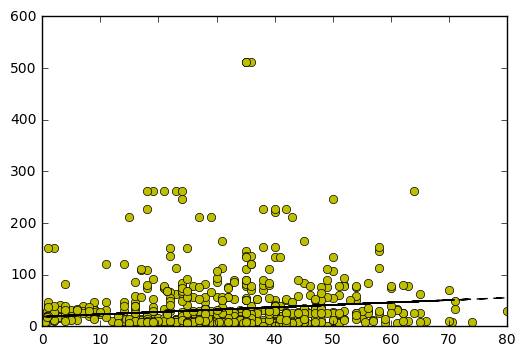

In [30]:
# Par l'utilisation de numpy:

# On determine les variables x (age des passagers) et y (cout du billet)
x = dfTrain["AgeFill"]
y = dfTrain["Fare"]

# On utilise la fonction polyfit pour ajuster le modèle linéaire aux données
fit = np.polyfit(x,y,1)

# On établit la prédiction des y en fonction des valeurs de x par le modèle linéaire
fit_fn = np.poly1d(fit) 

# On importe la librairie matplotlib pour pouvoir observer graphiquement la relation linéaire
import matplotlib.pyplot as plt

# On utilise la fonction plot pour ouvrir une instance graphique avec pour paramètres x, y et fit_fn(x) : les prédictions de y 
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
# On affiche le graphique
plt.show()



r-squared: 0.0150534439274


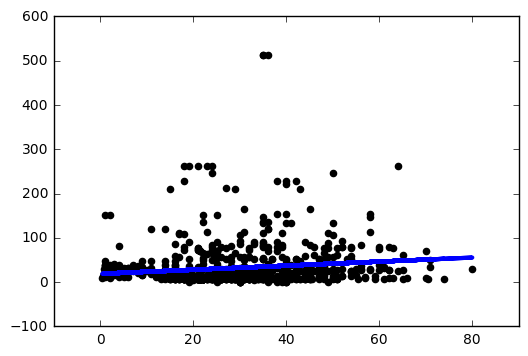

In [31]:
# Par l'utilisation de la librairie scipy

from scipy import stats
import numpy as np

x = dfTrain["AgeFill"]
y = dfTrain["Fare"]

# On utilise la fonction linregress qui retourne 5 valeurs:
# slope
# intercept
# r_value
# p_value
# std_err

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# On affiche le r carré qui évalue la force de la relation linéaire
print "r-squared:", r_value**2

# On calcule les prédictions de y par l'équation d'une relation linéaire
yFitted = slope*x + intercept 
    
# On dessine un nuage de points ayant pour coordonnées x et y 
plt.scatter(x, y,  color='black')
# On dessine la droite de regression formée par les coordonnées de x et les prédictions de y
plt.plot(x, yFitted, color='blue', linewidth=3)
# on affiche le graphique
plt.show()

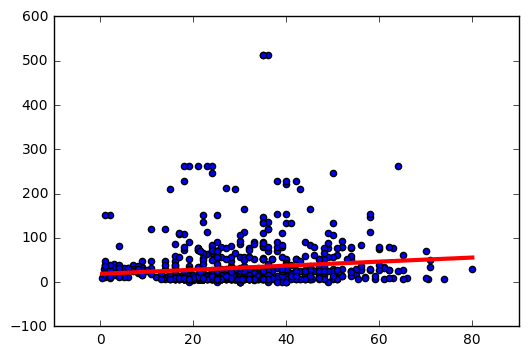

In [14]:
# Par l'utilisation de la librairie sklearn

from sklearn import datasets, linear_model

x = dfTrain["AgeFill"]
y = dfTrain["Fare"]

# On initialise un objet contenant le modèle linéaire
regr = linear_model.LinearRegression()

# On ajuste le modèle sur le dataset
regr.fit(x[:,np.newaxis], y)

# On créé un objet x_test qui représente les valeurs de x dans un espace linéaire
x_test = np.linspace(np.min(x), np.max(x), 100)

# Visualisation de la relation linéaire:

plt.scatter(x,y)
plt.plot(x_test, regr.predict(x_test[:,np.newaxis]), color='red', linewidth=3)
plt.show()



On voit par les graphiques et par la valeur de r² que ces regressions linéaires sont peu appropriées pour décrire la relation entre l'age et le prix du ticket pour l'ensemble des passagers.

Voyons ce qui se passe si nous ne prenons comme échantillon que les femmes de plus de 18 ans en 3ième classe et accompagnées par un ou plusieurs members de leur famille:

In [90]:
# cette cellule permet de tester plusieurs échantillons d'intérêt avant de garder celui (ou ceux) 
# qui nous semble le plus approprié pour tester une regression linéaire 

dfMaleAdult = dfTrain[ (dfTrain['Sex'] == 'female') 
                      & (dfTrain['Age'] > 18.0) 
                      & (dfTrain['Pclass'] == 3.0) 
                      #& (dfTrain['Embarked'] == "S") # cette condition n'est pas présentement testée
                      & (dfTrain['Parch'] > 1)
                     ]


r-squared: 0.323769898986


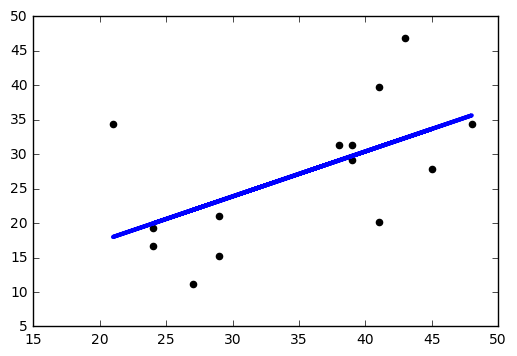

In [91]:
# Testons à nouveau le modèle linéaire sur cette échantillon: 

x = dfMaleAdult["AgeFill"]
y = dfMaleAdult["Fare"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print "r-squared:", r_value**2

yFitted = slope*x + intercept 
    
# Visualisation des données
plt.scatter(x, y,  color='black')
plt.plot(x, yFitted, color='blue', linewidth=3)
plt.show()

Nous commencons ici à dégager une relation interprétable:

Une femme plus jeune avait tendance à payer moins chère son billet qu'une femme plus agée lorsqu'elle voyagait en 3ième classe et qu'elle était accompagnée.

Reste à affiner cette relation!